# (Week3) 💐 アヤメ分析

```aim.```
+ データ分析の基本的な流れを知る
+ データ分析ライブラリのPandasに慣れる



---

[アヤメ - Wikipedia](https://www.google.com/search?q=%E3%82%A2%E3%83%A4%E3%83%A1&oq=%E3%82%A2%E3%83%A4%E3%83%A1&aqs=chrome..69i57j0i4i433j0i4l2j0i4i395l4j0i131i395i433j0i395.7348j1j7&sourceid=chrome&ie=UTF-8)

    「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。
    これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。
   + [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
   + [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
   + [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)


    setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。
    1本ごとに
    - sepal_length（がく片の長さ）, 
    - sepal_width（がく片の幅）, 
    - petal_length（花弁の長さ）, 
    - petal_width（花弁の幅）
   
    の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

---
## 【問題1】データの取得

    ドキュメントを参考にしながら、irisデータセット読み込みましょう。
    データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

```Cf.```
+ [sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
+ [pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
+ [pandas.DataFrameの行名・列名の変更 - note.nkmk.me](https://note.nkmk.me/python-pandas-dataframe-rename/)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y = pd.DataFrame(data=iris.target)
y = y.rename(columns={0:'Species'})
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


---
## 【問題2】データの結合

    問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。
    結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

```Cf.```
+ [Merge, join, and concatenate — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
+ [pandas.concat — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [6]:
frames = [X, y]
df = pd.concat(frames, axis=1)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


---
## 【問題3】データの確認

    今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。
     - 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
     - ラベルごとのサンプル数の合計を出力する。
     - 特徴量に欠損値があるかを確認する。
     - 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
     DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

```Cf.```

+ [pandas.DataFrame.head — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
+ [pandas.DataFrame.info — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
+ [pandas.DataFrame.describe — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
+ [pandas.DataFrame.isnull — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)
+ [pandas.DataFrame.sum — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)
+ [pandas.Series.value_counts — pandas 0.25.3 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)


In [7]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [13]:
# ラベルごとのサンプル数の合計を出力する
iris_label = pd.Series(iris.target)
iris_label.value_counts()

2    50
1    50
0    50
dtype: int64

In [20]:
# 特徴量に欠損値があるかを確認する。
df.isnull().sum() #欠損の合計数を返す

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [15]:
df.isnull().any() #欠損の可否をBoolで返す

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Species              False
dtype: bool

In [18]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object

In [21]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


---
## 【問題4】irisデータセット自体の調査

    ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、
    データセット自体についてもう少し調査しておきましょう。
    データセットを見る上で、そのデータセット自体について知っておくことも大切です。

---
## 【問題5】必要なデータを抽出

    DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。
     - sepal_widthの列を３つの異なる方法で抽出する
     - 50番目から99番目までのデータを抽出する
     - petal_lengthの列の50番目から99番目までのデータを抽出する
     - petal_widthの値が0.2のデータを抽出する
    .locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

```Cf.```
+ [PandasのDataFrameから値を取り出す色んな方法 - Qiita](https://qiita.com/osk_kamui/items/0a164ec002ff6d8798ca)
+ [pandasで任意の位置の値を取得・変更するat, iat, loc, iloc - note.nkmk.me](https://note.nkmk.me/python-pandas-at-iat-loc-iloc/)


**各データへのアクセス手法**
+ ```DataFrame['A']``` 列「A」の要素
+ ```DataFrame.A``` 同様に列「A」の要素（指定名にスペースを含んでるとNG）

**.loc　・・・ location**
> locはラベル名を指定
+ ```DataFrame.loc[:, ['A']]``` 全ての行の列「A」の要素
+ ```DataFrame.loc['Math',['A','C']]``` 行「Math」と列「A」「C」の要素

**.iloc ・・・ int location**
> ilocは行列番号を指定
+ DataFrame.iloc[0] 行「0」の要素
+ DataFrame.iloc[1] 行「1」の要素
+ DataFrame.iloc[:, 0:3] 全ての行の列「0〜2」までの要素
+ DataFrame.iloc[0, 0:4] 行「０」の列「0〜3」までの要素


In [32]:
# sepal_widthの列を３つの異なる方法で抽出(Extraction)する
extraction1 = df['sepal width (cm)']
extraction2 = df.loc[:, ['sepal width (cm)']]
extraction3 = df.iloc[:, 1]

print('#extraction is \n {} \n'.format(extraction1))
print('#extraction is \n {} \n'.format(extraction2))
print('#extraction is \n {} \n'.format(extraction3))

#extraction is 
 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64 

#extraction is 
      sepal width (cm)
0                 3.5
1                 3.0
2                 3.2
3                 3.1
4                 3.6
..                ...
145               3.0
146               2.5
147               3.0
148               3.4
149               3.0

[150 rows x 1 columns] 

#extraction is 
 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64 



In [ ]:
# マシューさんより
extraction4 = df.filter()

In [33]:
# 50番目から99番目までのデータを抽出する
df.loc[50:100, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [38]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.iloc[50:100, 3]

50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
55    1.3
56    1.6
57    1.0
58    1.3
59    1.4
60    1.0
61    1.5
62    1.0
63    1.4
64    1.3
65    1.4
66    1.5
67    1.0
68    1.5
69    1.1
70    1.8
71    1.3
72    1.5
73    1.2
74    1.3
75    1.4
76    1.4
77    1.7
78    1.5
79    1.0
80    1.1
81    1.0
82    1.2
83    1.6
84    1.5
85    1.6
86    1.5
87    1.3
88    1.3
89    1.3
90    1.2
91    1.4
92    1.2
93    1.0
94    1.3
95    1.2
96    1.3
97    1.3
98    1.1
99    1.3
Name: petal width (cm), dtype: float64

In [50]:
# petal_widthの値が0.2のデータを抽出する
df[ df['petal width (cm)'] == 0.2 ]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


---
## 【問題6】図の作成

    データは可視化して確認することが大切です。
    次の3つを行ってください。(作図のライブラリはMatplotlibの他seabornもよく使われます。)
     - ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
     - 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
     - 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

    箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。
    

```Cf.```
+ [matplotlib で円グラフを描く - Python でデータサイエンス](https://pythondatascience.plavox.info/matplotlib/%E5%86%86%E3%82%B0%E3%83%A9%E3%83%95)
+ [matplotlibを使ってデータ可視化(箱ひげ図) - Qiita](https://qiita.com/Kenta-Han/items/b074b499114f38d6de3e)
+ [seaborn.boxplot¶ - seaborn0.11.1](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
+ [pandas.DataFrame.boxplot¶ - Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)
+ [seaborn.violinplot¶ - seaborn0.11.1](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
+ [seabornで個別に作成したAxesオブジェクトを使う -Qiita](https://qiita.com/risuoku/items/d3b3eaf917a934a0e770)
+ [【matplotlib基礎】複数のグラフを並べて表示する - Qiita](https://qiita.com/trami/items/bd54f22ee4449421f2bc)


```箱ひげ図```
>
>**メリット：** 「最大値・最小値・四分位数」の情報を表現したグラフで、データの分布を大雑把に把握することができる。[Cf.箱ひげ図](https://www.google.com/search?q=%E7%AE%B1%E3%81%B2%E3%81%92%E5%9B%B3&oq=%E7%AE%B1%E9%AB%AD%E3%81%9A&aqs=chrome.1.69i57j0i10i131i433j0i10j0i10i395l7.6220j1j7&sourceid=chrome&ie=UTF-8)
>
>**用途:** 多くの水準からなる分布を視覚的に要約し、比較するために用いる。
>

```バイオリン図```
> **メリット：**  箱ひげ図に似ているが、異なる値のデータに確率密度(Density curve)を表示する点で異なっている。[Cf.バイオリン図](https://www.google.com/search?sxsrf=ALeKk01nChVCL9V42acS7CQ8H6YpYLQtiQ%3A1610957505949&ei=wUIFYI7IObTpmAW9tbOwBA&q=%E3%83%90%E3%82%A4%E3%82%AA%E3%83%AA%E3%83%B3%E5%9B%B3&oq=%E3%83%90%E3%82%A4%E3%82%AA%E3%83%AA%E3%83%B3%E5%9B%B3&gs_lcp=CgZwc3ktYWIQAzIGCAAQBBAlMgYIABAEECUyBggAEAQQJTIGCAAQBBAlMgYIABAHEB4yBggAEAcQHjIECAAQHjIECAAQHjoECCMQJzoGCAAQBRAeULcdWLcdYL4iaABwAHgAgAGNAYgBjwKSAQMwLjKYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=psy-ab&ved=0ahUKEwjOrI-vhKXuAhW0NKYKHb3aDEYQ4dUDCA0&uact=5)
>
> **用途：** データ分布がmultimodal（複数のピークがある）場合に特に有用である。

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

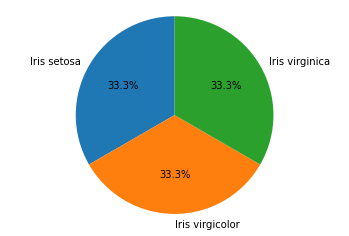

In [61]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
fig = plt.figure()
fig.patch.set_facecolor('white') #背景白
label = ["Iris setosa", "Iris virgicolor", "Iris virginica"]
plt.pie(iris_label.value_counts(), labels=label, startangle=90, autopct="%1.1f%%")
plt.axis('equal') #真円になるようにアスペクト比を固定（環境によって楕円になるのを防ぐ）
plt.show()

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[Species]'>]],
      dtype=object)

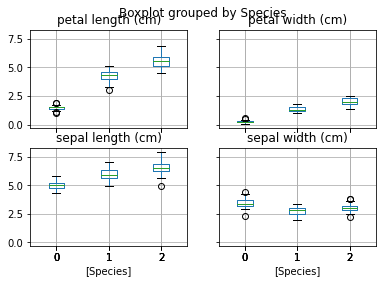

In [65]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
df.boxplot(by='Species')

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

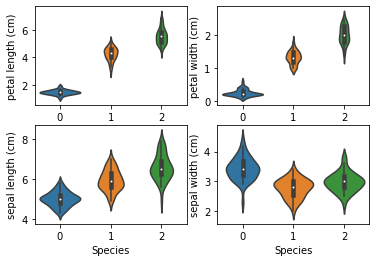

In [75]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
fig = plt.figure()
#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

x = 'Species'
y1,y2,y3,y4 = 'petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)'

sns.violinplot(x, y1, data=df, ax=ax1)
sns.violinplot(x, y2, data=df, ax=ax2)
sns.violinplot(x, y3, data=df, ax=ax3)
sns.violinplot(x, y4, data=df, ax=ax4)

plt.show()

---
## 【問題7】特徴量間の関係の確認
    特徴量間の関係を見ていきます。次の4つを行ってください。

    - 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
    - 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
    - ４つの特徴量に関する相関係数行列を作る
    - 相関係数行列のヒートマップを作る(１つ)

    相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

```Cf.```
+ [pandas.DataFrame.corr — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

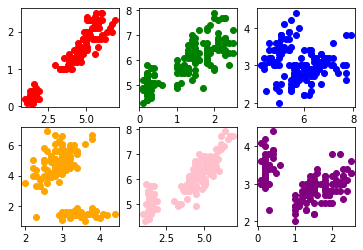

In [118]:
fig = plt.figure()

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

x1,x2,x3,x4 = 'petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)'
y1,y2,y3,y4 = 'petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)'

ax1.scatter(df[x1], df[y2], color='r')
ax2.scatter(df[x2], df[y3], color='g')
ax3.scatter(df[x3], df[y4], color='b')
ax4.scatter(df[x4], df[y1], color='orange')
ax5.scatter(df[x1], df[y3], color='pink')
ax6.scatter(df[x2], df[y4], color='purple')
plt.show()

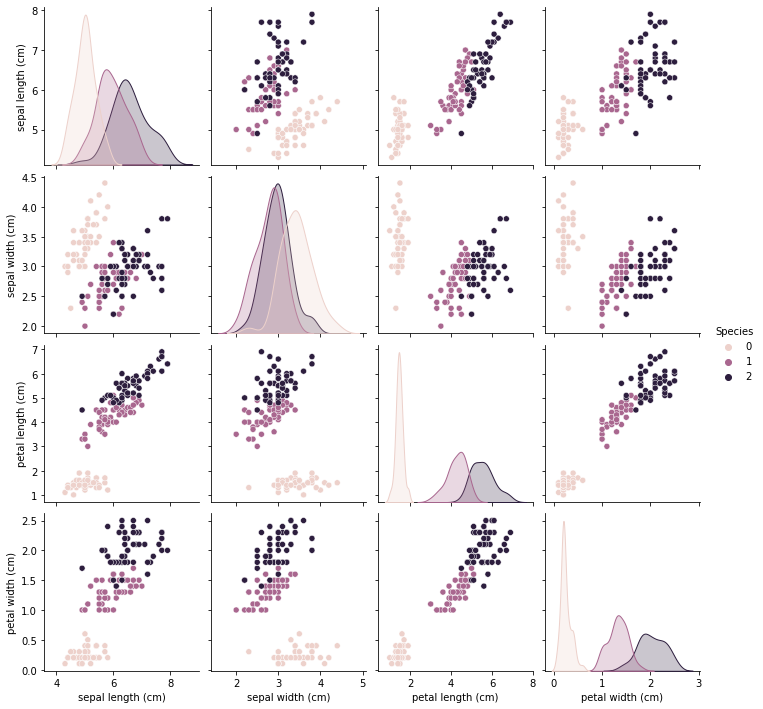

In [137]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
sns.pairplot(df, hue='Species')

In [138]:
# ４つの特徴量に関する相関係数行列を作る
df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

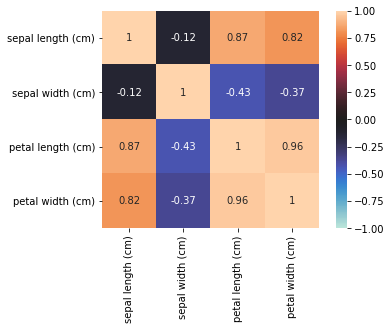

In [133]:
# 相関係数行列のヒートマップを作る(１つ)
x = df.iloc[:,:4].corr()
sns.heatmap(x, vmin=-1.0,vmax=1.0, center=0, annot=True, square=True)

---
## 【問題8】可視化したグラフや表の結果の説明
    データを探索した時には、結果を述べる（+考察する）ことが大切です。
    ここまでで作成した表や図から読み取れることや気づきを説明してください。
    
    e.g.散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

setosa種は、どの種よりも其々の特徴量が顕著で識別が容易である。
一方、virgicolor種、virginica種はいずれも外れ値があるものの、顕著な特徴は掴みづらい。理由としてはデータの被りが見られる為。

ヒートマップより、「花弁の長さ（幅）×花弁の幅（長さ）」に強い正の相関関係が見れる。
線形モデルを予測する際はこの点に着目して予測モデルを作成すると良いと考える。